**Electronic music genre classification**

This project started as a classifier of general music genres, but we encountered a problem. While we were able to obtain around 80% accuracy in our model, the genres we used had very broad characteristics.

We decided then to switch the direction of the work, and focus on identifying subgenres instead of metagenres.

The first step wast to obtain our dataset, classified by genres, from Spotify API. In order to do that, we created a python script, which can be found at utils/get_dataset/main.py

In [3]:
# This was the resulting datset, with 5826 entries and 24 columns

import pandas as pd
df = pd.read_csv('data/raw_data/electronics_all_genres_playlists.csv')
df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,3FnaCm5NYQh8prhCfPDNOV,https://open.spotify.com/playlist/7HxEKL4NF7ZK...,The Sound of Tech House,Promised,42,Pig&Dan,Promised,https://i.scdn.co/image/ab67616d0000b273510295...,"['dark techno', 'microhouse', 'minimal techno'...",41,...,1.0,0.0400,0.026700,0.87800,0.0854,0.0367,124.005,562229.0,4.0,techhouse
1,3oJaIce9FdZyKlpQ22jxp5,https://open.spotify.com/playlist/7HxEKL4NF7ZK...,The Sound of Tech House,Dark Matter,47,Dubfire,Dark Matter / Dust & Gas,https://i.scdn.co/image/ab67616d0000b273d6c80d...,"['deep minimal techno', 'minimal techno', 'tec...",43,...,1.0,0.0767,0.000703,0.88600,0.0721,0.1240,131.999,530496.0,4.0,techhouse
2,50MkrUXSXsS1Q1bn95XQcm,https://open.spotify.com/playlist/7HxEKL4NF7ZK...,The Sound of Tech House,Sleepless - Stephan Bodzin Remix,48,Pan-Pot,The Other Remixes,https://i.scdn.co/image/ab67616d0000b27379a15e...,"['german techno', 'microhouse', 'minimal techn...",40,...,1.0,0.0462,0.000220,0.81100,0.0869,0.0845,119.991,540000.0,4.0,techhouse
3,2hJRfyYiJ8umxp1WdbeyLj,https://open.spotify.com/playlist/7HxEKL4NF7ZK...,The Sound of Tech House,Dubmission - 2021 Edit,51,Anja Schneider,Dubmission (Original Edit),https://i.scdn.co/image/ab67616d0000b2730b9874...,"['electra', 'german house', 'german techno', '...",44,...,1.0,0.0947,0.335000,0.89100,0.0971,0.2760,122.033,186885.0,4.0,techhouse
4,1BpG59DLyW6jZxN2PYiUA3,https://open.spotify.com/playlist/7HxEKL4NF7ZK...,The Sound of Tech House,2daBeat,47,Super Flu,Musik 3,https://i.scdn.co/image/ab67616d0000b273f2fcdb...,"['deep euro house', 'german house', 'microhous...",43,...,0.0,0.0687,0.109000,0.00864,0.0836,0.2210,120.022,329787.0,4.0,techhouse


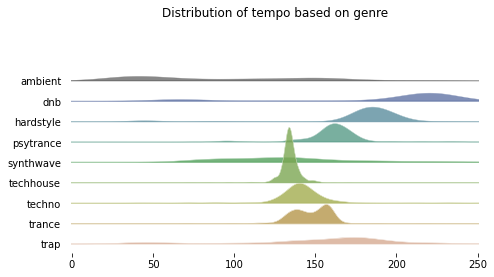

In [4]:
# After analysing our data, we found our that the tempo was very different depending on the music genres, 
# and we knew it was going to be a decisive feature for the classification

from matplotlib import cm
import matplotlib.pyplot as plt
import joypy
from joypy import joyplot
fig, axes = joyplot(df, by = 'genre', column = 'tempo', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of tempo based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([50,190])  
plt.show()

In [ ]:
# After cleaning the data, we applied a transformation to the tempo feature, removing tracks which are 
# under or over the stablished ones for the specific subgenre